<a href="https://colab.research.google.com/github/Harp24IT/Diabetes-Prediction-Analysis/blob/main/DIABETES_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
df.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes         int64
dtype: object

In [ ]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Returns basic statistics on numeric columns
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().any()


pregnancies    False
glucose        False
diastolic      False
triceps        False
insulin        False
bmi            False
dpf            False
age            False
diabetes       False
dtype: bool

In [ ]:
#To get details of the outcome column
df['diabetes'].value_counts()


0    500
1    268
Name: diabetes, dtype: int64

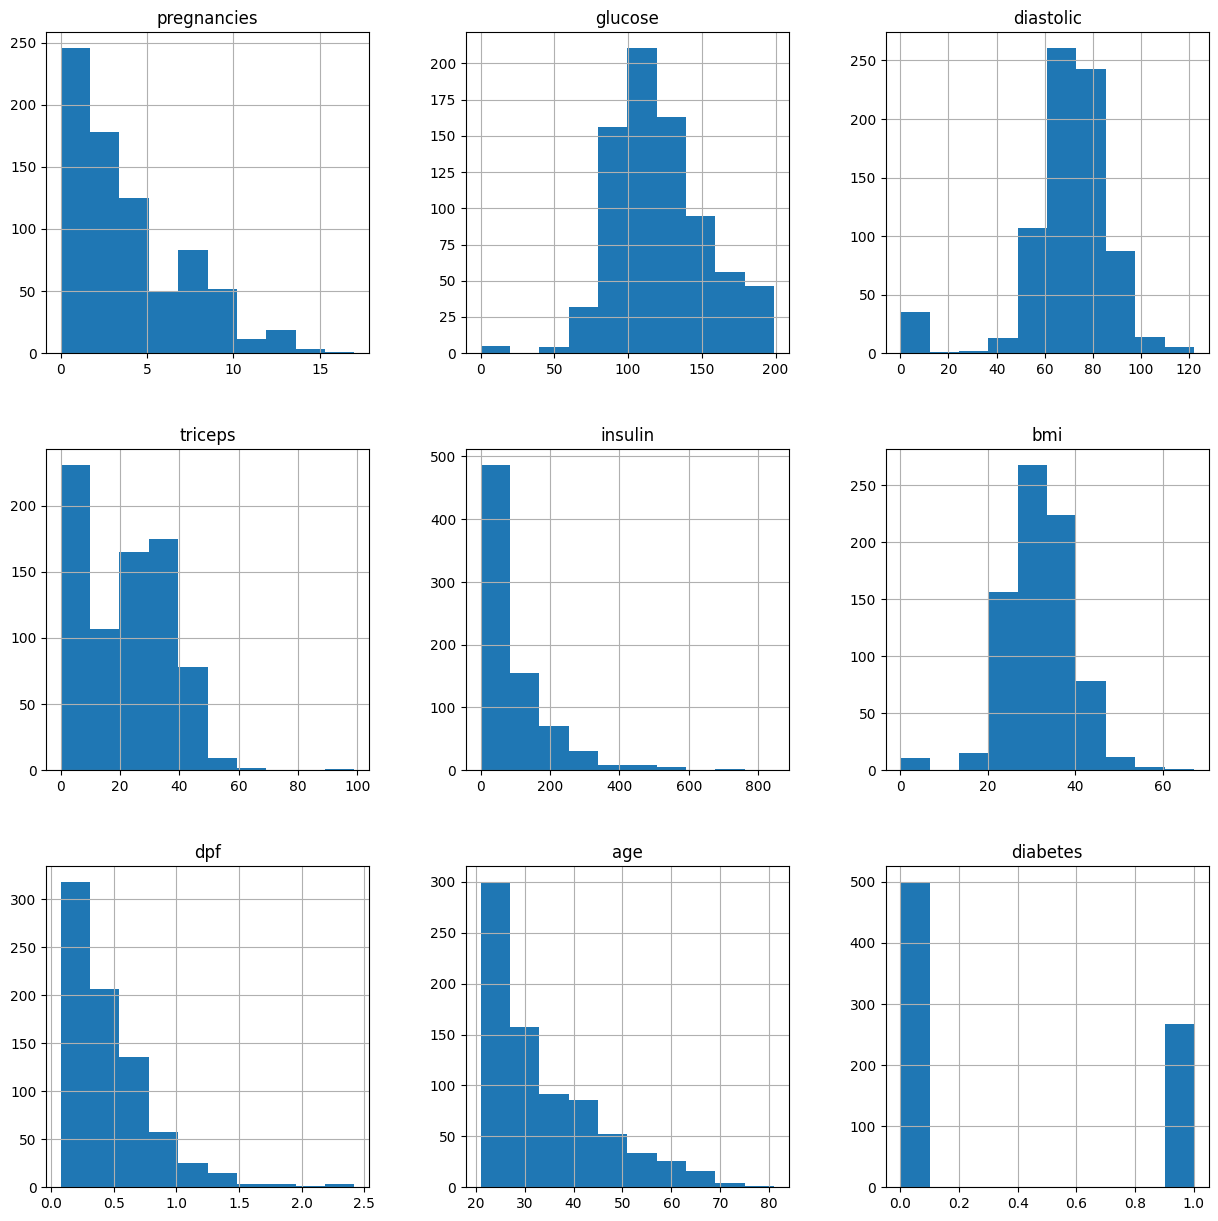

In [ ]:
p = df.hist(figsize = (15,15))


In [ ]:
# separating the data and labels
X = df.drop(columns = 'diabetes', axis=1)
Y = df['diabetes']

# To print the independent variables
print(X)

     pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age
0              6      148         72       35        0  33.6  0.627   50
1              1       85         66       29        0  26.6  0.351   31
2              8      183         64        0        0  23.3  0.672   32
3              1       89         66       23       94  28.1  0.167   21
4              0      137         40       35      168  43.1  2.288   33
..           ...      ...        ...      ...      ...   ...    ...  ...
763           10      101         76       48      180  32.9  0.171   63
764            2      122         70       27        0  36.8  0.340   27
765            5      121         72       23      112  26.2  0.245   30
766            1      126         60        0        0  30.1  0.349   47
767            1       93         70       31        0  30.4  0.315   23

[768 rows x 8 columns]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64


In [ ]:
#Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


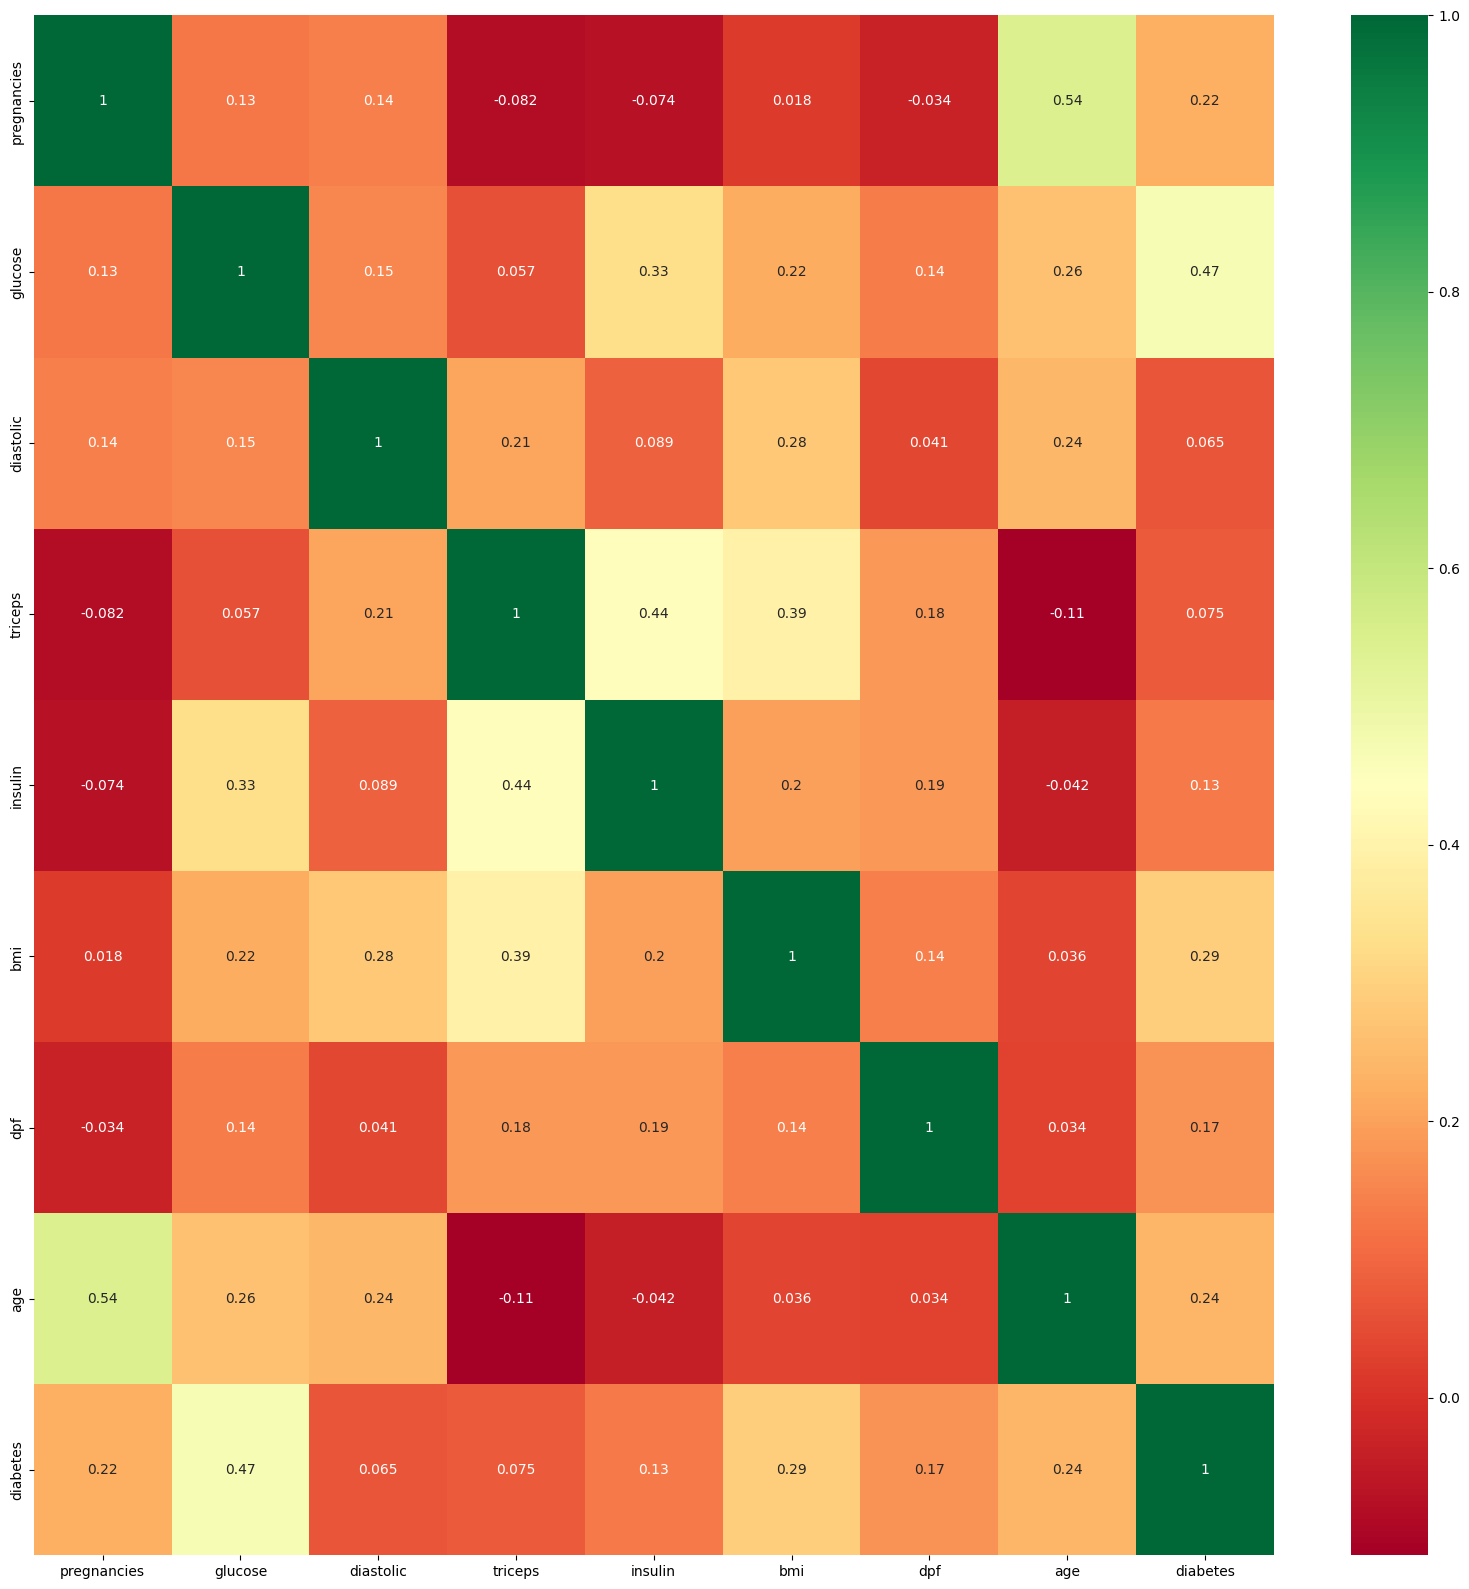

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



<Axes: xlabel='diabetes', ylabel='glucose'>

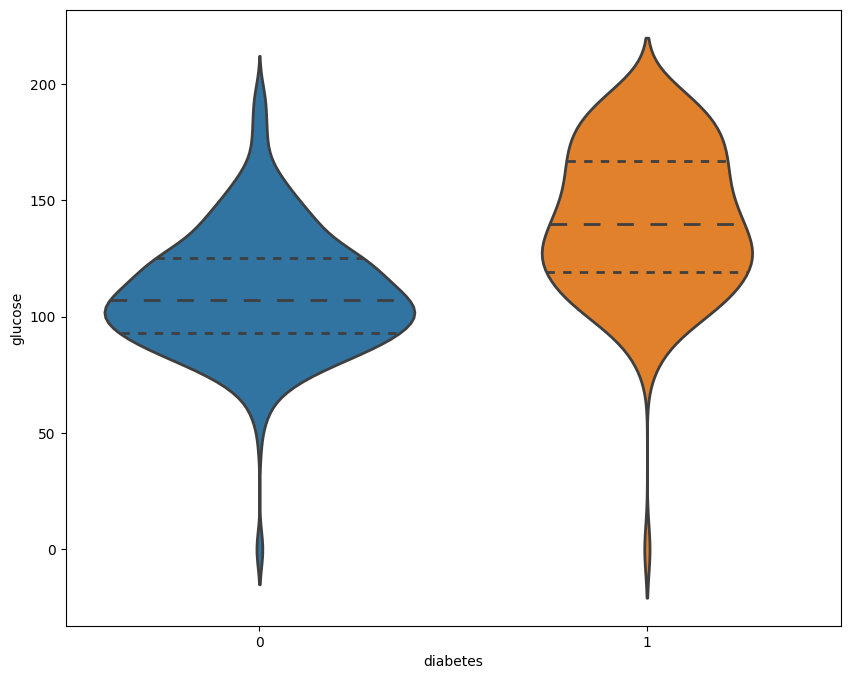

In [ ]:
# Exploring the Glucose and the Target variables together
plt.figure(figsize = (10, 8))
sns.violinplot(data = df, x = "diabetes", y = "glucose",
               split = True, inner = "quart", linewidth = 2)

<Axes: xlabel='count', ylabel='diabetes'>

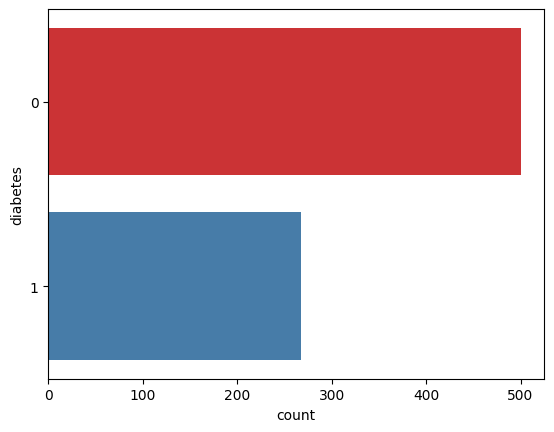

In [ ]:
 #count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=df['diabetes'],palette='Set1')

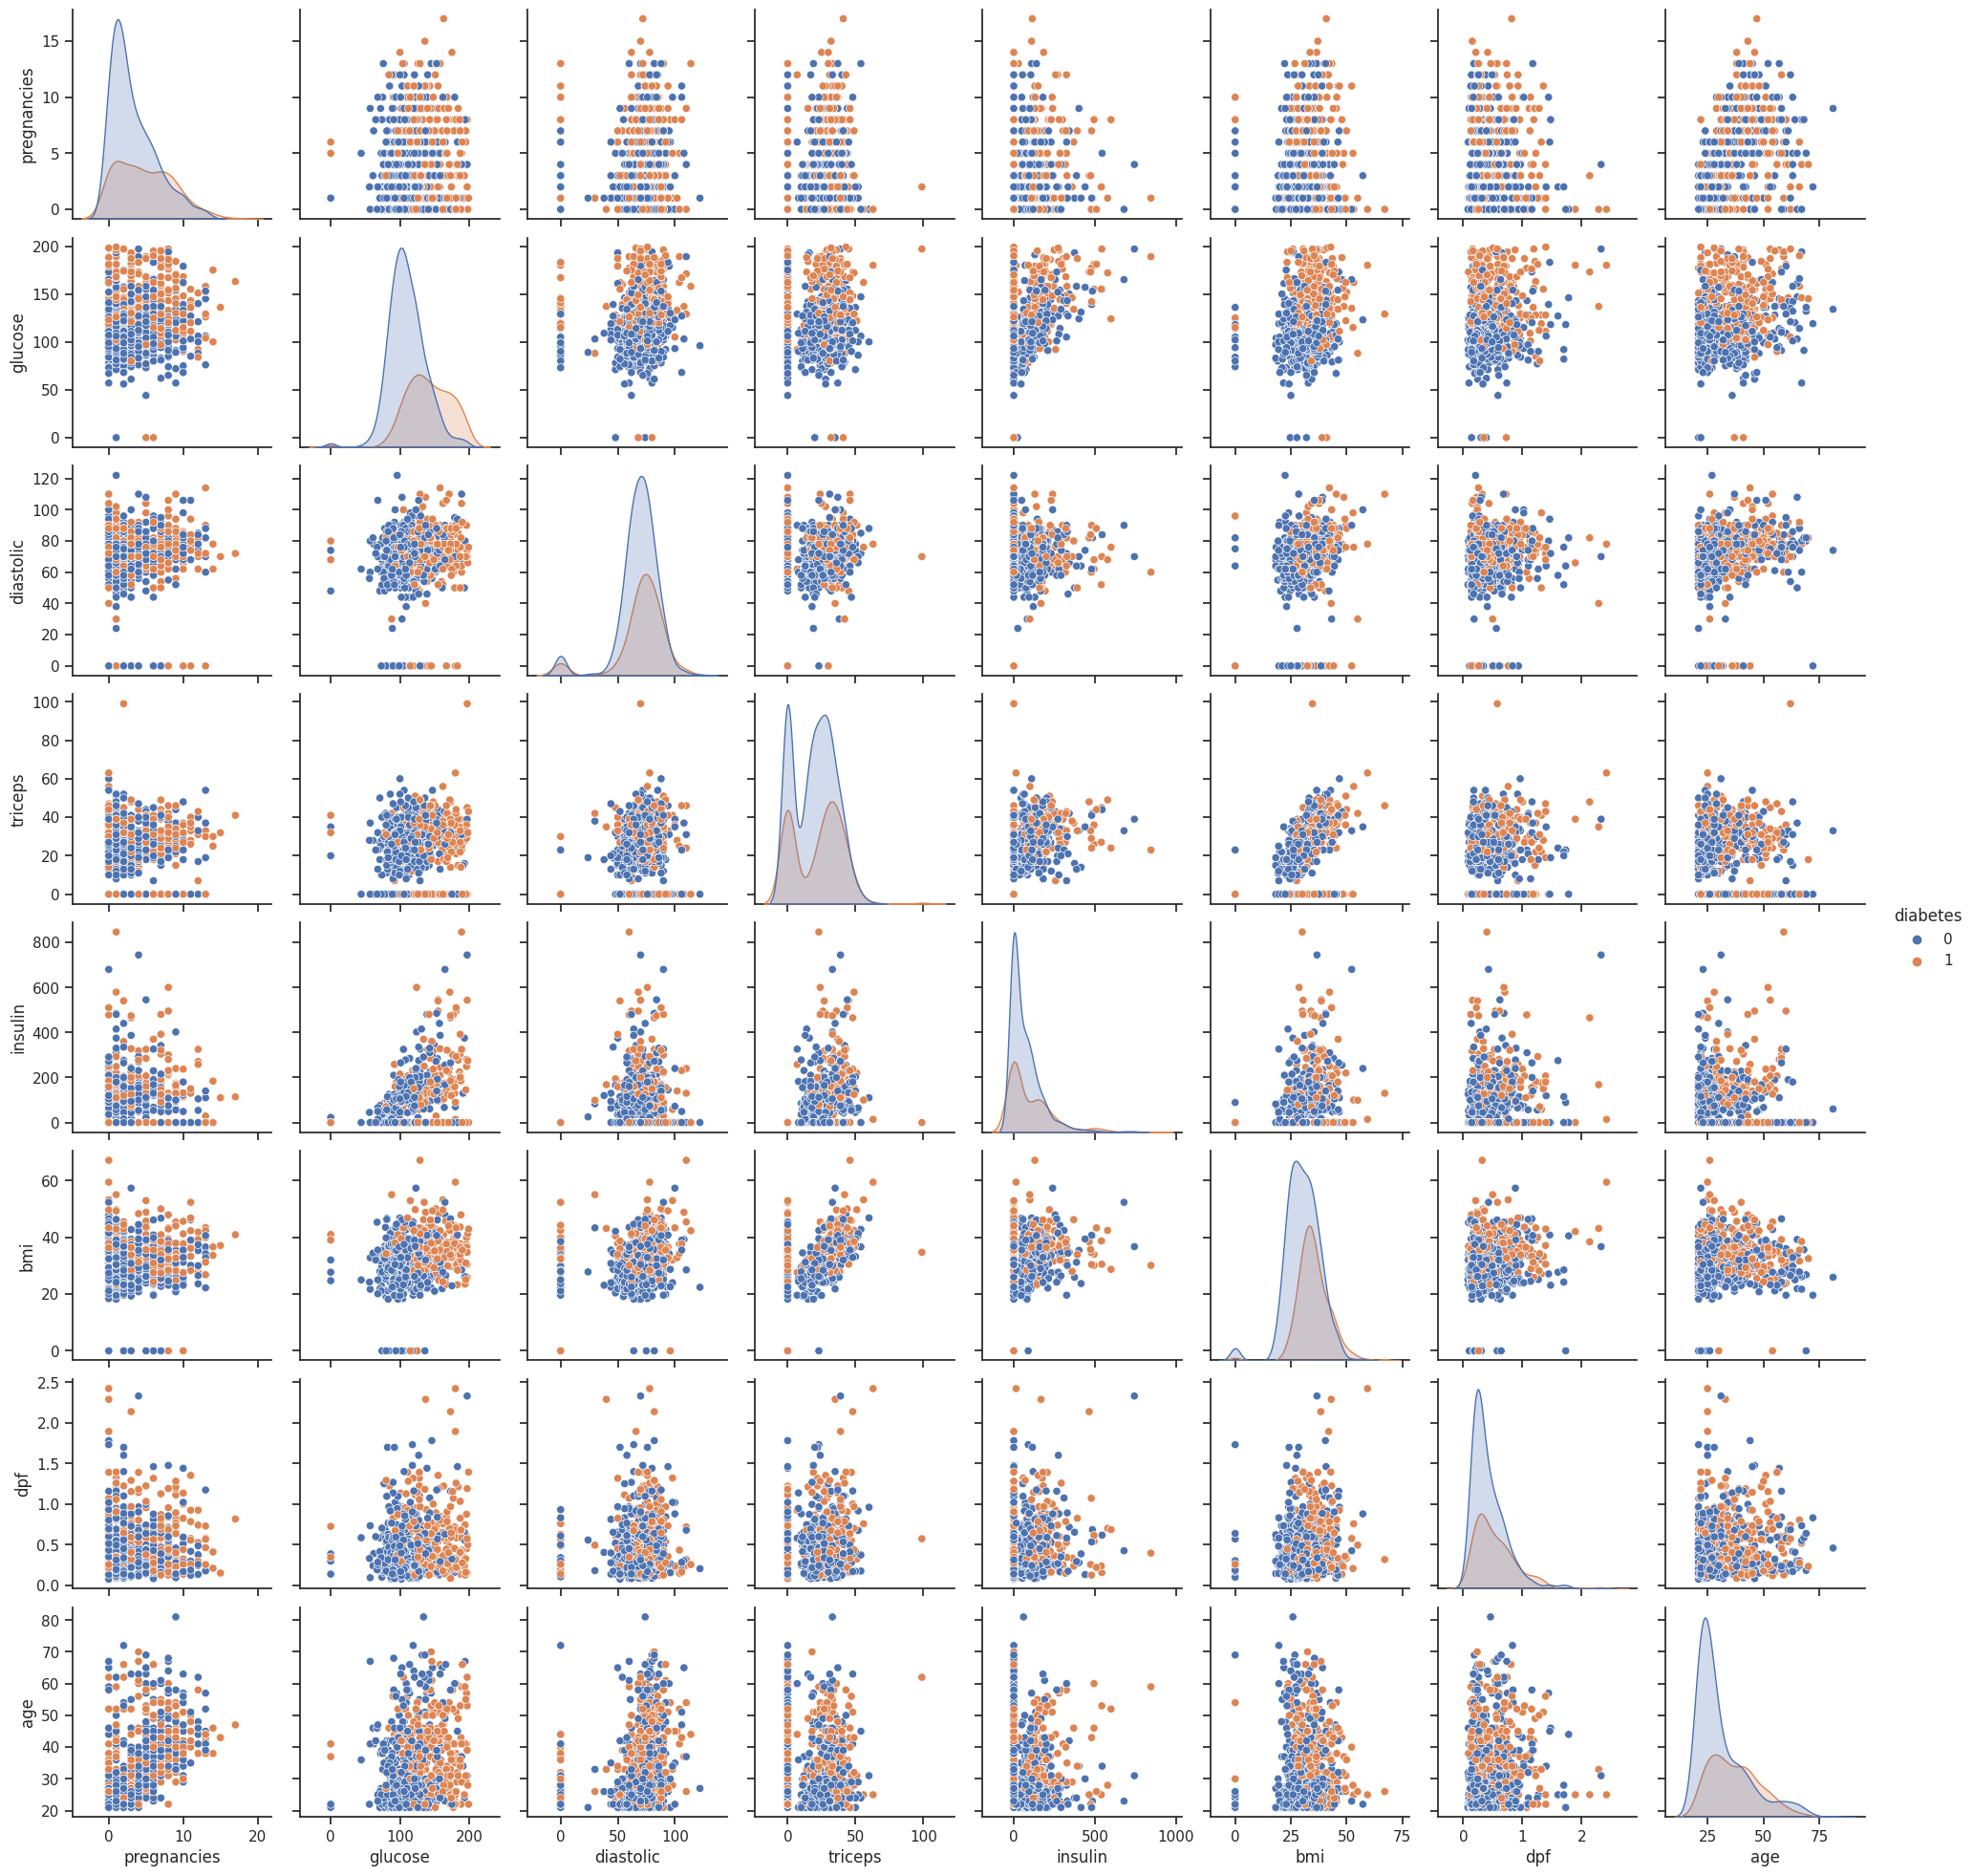

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="diabetes")

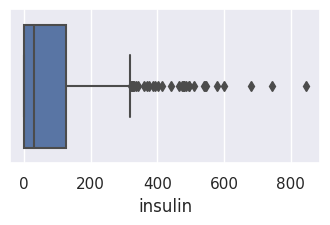

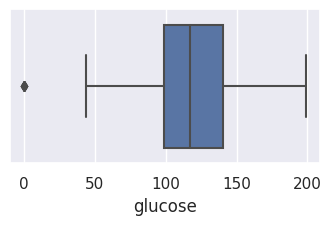

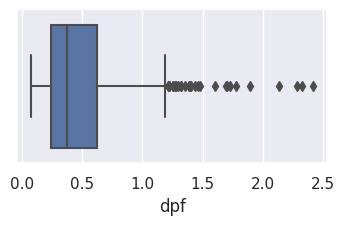

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['insulin'])
plt.show()
sns.boxplot(x=df['glucose'])
plt.show()
sns.boxplot(x=df['dpf'])
plt.show()

<ipython-input-18-1b99ab590a66>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(df["glucose"][df["diabetes"] == 1], color = "Red", shade = True)
<ipython-input-18-1b99ab590a66>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(df["glucose"][df["diabetes"] == 0], ax = kde, color = "Blue", shade= True)


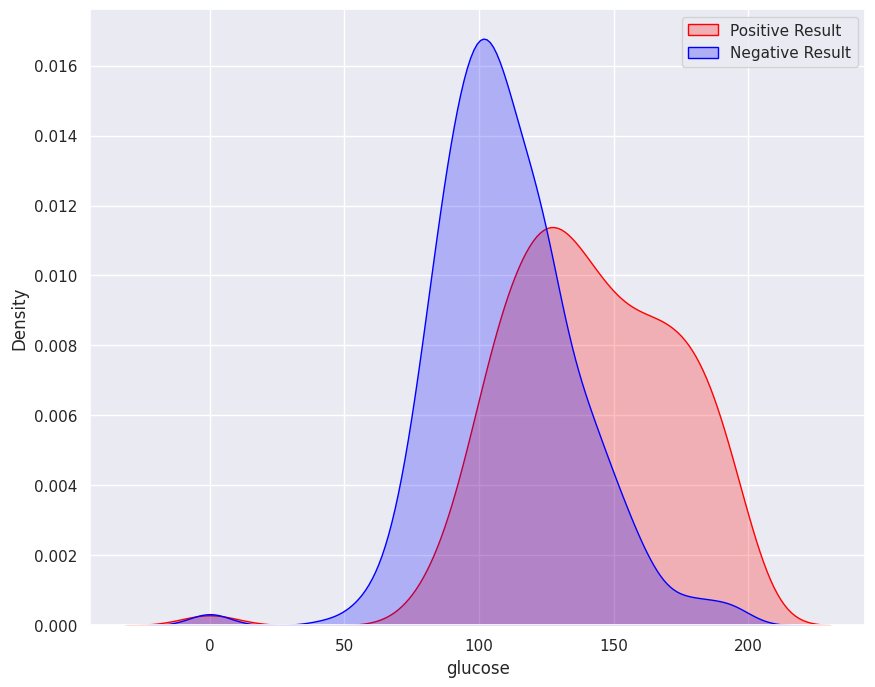

In [ ]:
plt.figure(figsize = (10, 8))
kde = sns.kdeplot(df["glucose"][df["diabetes"] == 1], color = "Red", shade = True)
kde = sns.kdeplot(df["glucose"][df["diabetes"] == 0], ax = kde, color = "Blue", shade= True)
kde.set_xlabel("glucose")
kde.set_ylabel("Density")
kde.legend(["Positive Result","Negative Result"])

0    500
1    268
Name: diabetes, dtype: int64


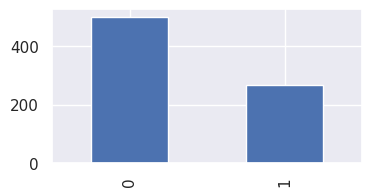

In [ ]:

#Now, check that how well our outcome column is balanced

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["diabetes"].map(lambda x: color_wheel.get(x + 1))
print(df.diabetes.value_counts())
p=df.diabetes.value_counts().plot(kind="bar")

<ipython-input-20-33a1d75bb9d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(df['insulin'])


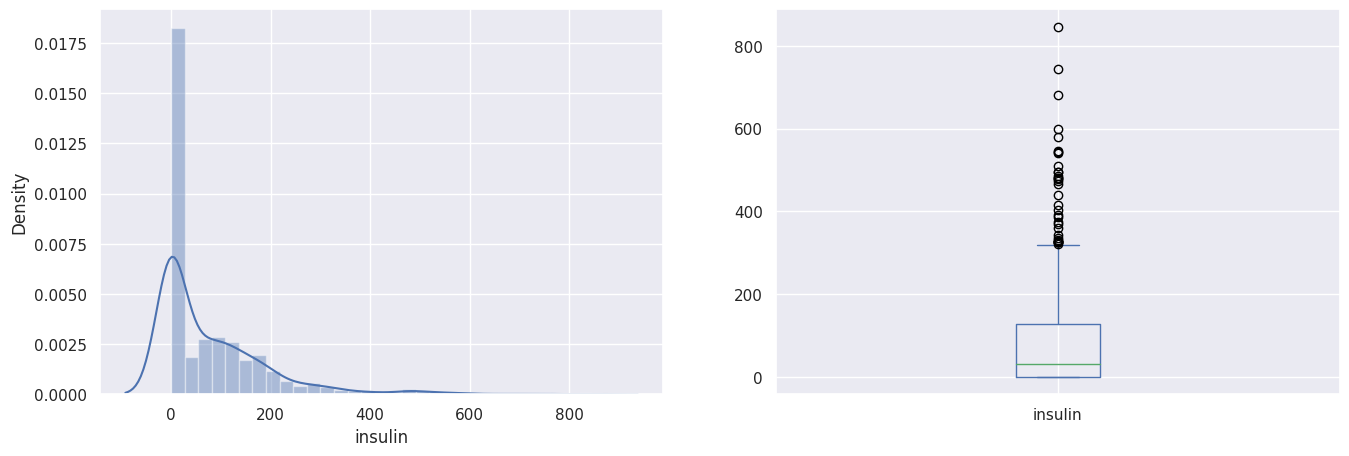

In [ ]:

plt.subplot(121), sns.distplot(df['insulin'])
plt.subplot(122), df['insulin'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
_
from sklearn.tree import DecisionTreeClassifier



In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics


predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(Y_test,predictions)))



Accuracy Score = 0.7012987012987013


In [ ]:

from xgboost import XGBClassifier


xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

from sklearn import metrics


xgb_pred = xgb_model.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(Y_test, xgb_pred)))

Accuracy Score = 0.7402597402597403


In [ ]:

from sklearn.svm import SVC


svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)
classifier = svm.SVC(kernel='linear')


#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7833876221498371


In [ ]:

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7727272727272727
